Experimenting and analysing with the buko dataset.

In [1]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import processing
sns.set_theme(context="notebook")

In [2]:
fileloc='../../Raw_data_van_Tim/BISAS Data Ruw/'
file=fileloc+'retourbonregels.csv'
df=pd.read_csv(file,skip_blank_lines=True,header=0,encoding='ascii',encoding_errors='backslashreplace',sep=';',on_bad_lines='warn')
# df.head()

In [3]:
orderfile=fileloc+'order.csv'
df=pd.read_csv(orderfile,skip_blank_lines=True,header=0,encoding='ascii',encoding_errors='backslashreplace',sep=';',on_bad_lines='warn')
# df.head()

b'Skipping line 19887: expected 17 fields, saw 18\n'
b'Skipping line 54124: expected 17 fields, saw 18\n'
b'Skipping line 67095: expected 17 fields, saw 18\nSkipping line 67156: expected 17 fields, saw 18\nSkipping line 79843: expected 17 fields, saw 19\nSkipping line 89777: expected 17 fields, saw 18\nSkipping line 93045: expected 17 fields, saw 18\nSkipping line 95041: expected 17 fields, saw 18\nSkipping line 97691: expected 17 fields, saw 18\nSkipping line 98042: expected 17 fields, saw 18\n'
b'Skipping line 98497: expected 17 fields, saw 18\nSkipping line 99075: expected 17 fields, saw 18\nSkipping line 101426: expected 17 fields, saw 18\nSkipping line 104485: expected 17 fields, saw 18\nSkipping line 104555: expected 17 fields, saw 18\nSkipping line 106142: expected 17 fields, saw 18\nSkipping line 106165: expected 17 fields, saw 18\nSkipping line 106177: expected 17 fields, saw 18\nSkipping line 106179: expected 17 fields, saw 18\nSkipping line 106180: expected 17 fields, saw 18

After doing a bit of thinking. The first idea is to divide the data in regions. For each region we try to see for each article how many are rented per day. And plot that as a time series. 
### Connection of files is as follows

### ORDER 
* #### Bestelbon  Retourbon
  * ##### Bestelbonregel Retourbonregel 

NB: regel means row

In [4]:
#let us start with region  and article details
region_file=fileloc+'vestiging.csv'
df_r=pd.read_csv(region_file,skip_blank_lines=True,header=0,encoding='ascii',encoding_errors='backslashreplace',sep=';',on_bad_lines='warn')
#rotterdam code is 3 
vestiging_code=3
artikel_file=fileloc+'artikel.csv'
df_art=pd.read_csv(artikel_file,skip_blank_lines=True,header=0,encoding='ascii',encoding_errors='backslashreplace',sep=';',on_bad_lines='warn')
df_art.head()
#let us consider artikel Dranghek
# artikel_code='DRANGHEK'
# artikel_code='991'
artikel_code='BUISPOOT'

Steps are as follows:
* Get the order numbers for rotterdam or a region
* Take this input in Bestelbon which gives you the bestelbon code and in date,
* Give it to bestel bon regels and check if that order has that artikel. If so, go ahead with retourbon . 
* In retourbon regels get the retourbon for that bestelbon
* in retourbon get the out  date. 
* save this in a dictionary to process later,.

In [64]:
import importlib
importlib.reload(processing)

<module 'processing' from 'c:\\Users\\Amey\\Documents\\BUKO_forecasting\\Modelling\\model\\processing.py'>

In [65]:
start_year=2015
end_year=2016
order_file=fileloc+'order.csv'
reg_order_series,vestiging_series=processing.get_order_numbers(order_file,vestiging_code,start_year,end_year)


c:\Users\Amey\Documents\BUKO_forecasting\Modelling\model\processing.py:30: DtypeWarning: Columns (0,3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  #function to get order numbers based on regions.


In [6]:
(bestel_art_nos_vec,quant_bestel_art_vec,retour_art_nos_vec,manco_art_nos_vec,bestel_b_number_vec,order_number_vec,indate_vec,bestel_b_regel_number_vec)=processing.get_all_data(reg_order_series,artikel_code,0,10)
        

Checking for order number:300002
The Bestel bon numbers in this order are:['300002.B001']
Length of the bestel number series is:1
Artikles in this bestel number are:0    VERVALLEN
1    VERVALLEN
2    VERVALLEN
Name: Artikel, dtype: object
Number of Artikels in this bestel number are:3
No artikel of this type in bestel number:300002.B001
Checking for order number:300003
The Bestel bon numbers in this order are:['300003.B001']
Length of the bestel number series is:1
Artikles in this bestel number are:3    991
Name: Artikel, dtype: object
Number of Artikels in this bestel number are:1
No artikel of this type in bestel number:300003.B001
Checking for order number:300007
The Bestel bon numbers in this order are:['300007.B001']
Length of the bestel number series is:1
Artikles in this bestel number are:4         AHEK
5     BUISPOOT
6     BUISPOOT
7       C01-80
8           P1
9       E01-60
10     TB4080W
11          P2
Name: Artikel, dtype: object
Number of Artikels in this bestel number are

In [8]:
import importlib
importlib.reload(processing)
(enddate_vec,art_retour_vec)=processing.get_enddate(bestel_b_regel_number_vec,artikel_code)
    

Int64Index([1339], dtype='int64')
Corresponding retour bon is:1339    300007.R001
Name: Retourbon, dtype: object
Int64Index([1338], dtype='int64')
Corresponding retour bon is:1338    300007.R001
Name: Retourbon, dtype: object


The next step is to take the indate and out date. and find the number of articles accordingly for the month. 

In [9]:
year_time_series=pd.date_range(start="01-01-2007",end="01-01-2008",freq='M')


In [10]:
net_art_month_vec=[]
for month in year_time_series.month:
    print(month)
    net_art_month=processing.calculate_net_articles(month,quant_bestel_art_vec,bestel_art_nos_vec,indate_vec,enddate_vec,retour_art_nos_vec)
    net_art_month_vec=np.append(net_art_month_vec,net_art_month)
    

1
2
3
4
5
6
7
8
9
10
11
12


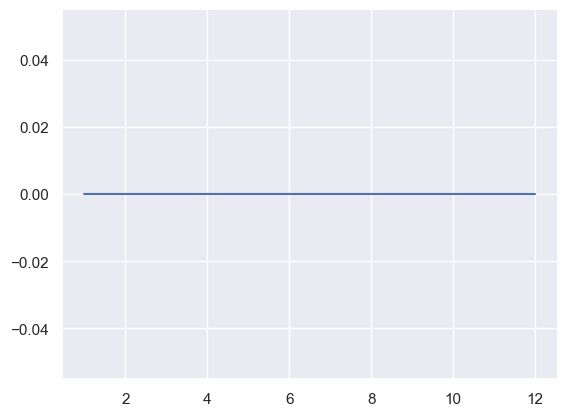

In [69]:
fig=plt.figure()
plt.plot(year_time_series.month,net_art_month_vec)
fig.savefig(r'C:\Users\Amey\Documents\BUKO_forecasting\Results\Month_plot_test.jpg')

The above logic although correct is very slow!!! Need to find a quicker way. 

First step is to take order numbers only from 2015. So modified the function to take date_indicies of a particular year 

Then the idea is to merge all the bestel bon regels and retourbon regels based on the bon number (Tim did that.)
And just get the artikel order numbers and compare that to order numbres we have A new file with processing will be needed for that .

In [61]:
importlib.reload(processing)

start_year=2015
end_year=2016
processing.get_date_ind(order_date_series,start_year,end_year)

05-01-2015
06-01-2015
07-01-2015
08-01-2015
09-01-2015
10-01-2015
12-01-2015
13-01-2015
14-01-2015
15-01-2015
16-01-2015
19-01-2015
20-01-2015
21-01-2015
22-01-2015
23-01-2015
26-01-2015
27-01-2015
28-01-2015
29-01-2015
30-01-2015
02-02-2015
03-02-2015
04-02-2015
05-02-2015
06-02-2015
09-02-2015
10-02-2015
11-02-2015
12-02-2015
13-02-2015
16-02-2015
17-02-2015
18-02-2015
17-02-2015
18-02-2015
19-02-2015
20-02-2015
21-02-2015
23-02-2015
24-02-2015
25-02-2015
26-02-2015
27-02-2015
02-03-2015
03-03-2015
04-03-2015
05-03-2015
06-03-2015
09-03-2015
10-03-2015
11-03-2015
12-03-2015
13-03-2015
16-03-2015
17-03-2015
18-03-2015
19-03-2015
20-03-2015
23-03-2015
24-03-2015
25-03-2015
26-03-2015
27-03-2015
30-03-2015
31-03-2015
01-04-2015
02-04-2015
07-04-2015
08-04-2015
09-04-2015
10-04-2015
13-04-2015
21-04-2015
13-04-2015
14-04-2015
15-04-2015
16-04-2015
17-04-2015
20-04-2015
21-04-2015
22-04-2015
23-04-2015
24-04-2015
04-06-2015
24-04-2015
28-04-2015
29-04-2015
30-04-2015
01-05-2015
04-05-2015

array([74320., 74321., 74322., ..., 85742., 85803., 85806.])

In [56]:
order_date_series[date_ind]

74320    05-01-2015
74321    05-01-2015
74322    05-01-2015
74327    05-01-2015
74330    05-01-2015
            ...    
85738    21-12-2015
85741    21-12-2015
85742    21-12-2015
85803    21-12-2015
85806    24-12-2015
Name: Datum, Length: 6097, dtype: object

In [41]:
print(loc[0])

213272
